In [1]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

n_samples, n_features = X.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [2]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)

In [3]:
class Model(nn.Module):
    def __init__(self, n_input_features):
        super(Model, self).__init__()
        self.linear = nn.Linear(n_input_features, 1)
        
    def forward(self, x):
        y_predicted = torch.sigmoid(self.linear(x))
        return y_predicted
      
model = Model(n_features)

In [70]:
num_epochs = 1000
learning_rate = 0.01
loss = nn.BCELoss()
optimiser = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [108]:
for epoch in range(num_epochs):
    y_predicted = model(X_train)
    l = loss(y_predicted, y_train)
    l.backward()
    optimiser.step()
    optimiser.zero_grad()
    
    if (epoch+1) % 100 == 0:
        print(f'epoch: {epoch+1}, loss = {l.item():.4f}')
        
with torch.no_grad():
    y_predicted = model(X_test)
    y_predicted_cls = y_predicted.round()
    
    acc = sum(y_predicted_cls == y_test) / len(y_test)
    print('Accuracy ', acc.item())

epoch: 100, loss = 0.0312
epoch: 200, loss = 0.0311
epoch: 300, loss = 0.0311
epoch: 400, loss = 0.0311
epoch: 500, loss = 0.0310
epoch: 600, loss = 0.0310
epoch: 700, loss = 0.0310
epoch: 800, loss = 0.0309
epoch: 900, loss = 0.0309
epoch: 1000, loss = 0.0309
Accuracy  0.9561403393745422


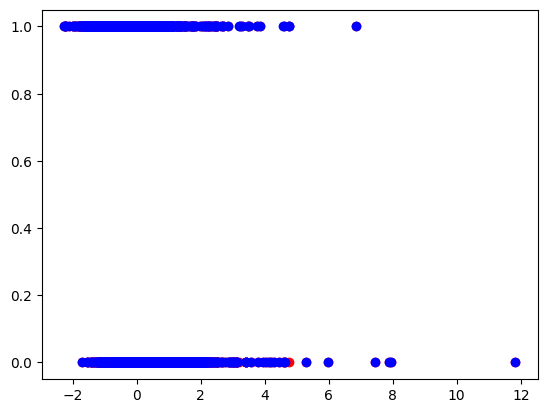

In [107]:
import matplotlib.pyplot as plt

plt.plot(X_test, y_test, 'ro', )
plt.plot(X_test, y_predicted_cls.detach().numpy(), 'bo',)
plt.show()